<img src="Images/logo.jpg" width="600">

## <center> <span style="color:darkred"> Exercitation_10 </span> </center>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### <font color="blue"> Part 01

In this part, we have to solve the salesman traveler problem in a different way, the **simulated annealing**. The key of this method is the analogy with thermodynamics, and the behaviours of liquid and solid molecules when decreasing the temperature.  Essentially, we are slowly cooling the system varying $\beta$ with time.  

I started from the code wrote in the previous exercitation, keeping only the first part, because now we do not have a population and different generation, we have only an individual, which can mutate with a Metropolis algorithm and we can accept this mutation or not, with probability

$$ P = 1 \quad \text{if} \quad L^{(2)}_A(\vec{x}) < L^{(2)}_B(\vec{x}) $$ 
$$ P = e^{-\beta (L^{(2)}_A(\vec{x}) -L^{(2)}_B(\vec{x}))} \quad \text{if} \quad L^{(2)}_A(\vec{x}) > L^{(2)}_B(\vec{x}) \, , $$

where $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_{30}) = \sum_{i=1}^{30} |\vec{x}_i-\vec{x}_{i+1}|^2$ and pedices $A$ and $B$ stay for two different configurations.


I added the function SA (*simulated annealing*) which can do this, and I fixed the parameters: 
- number of mutations $N_{mut} = 10$
- $\beta \in [0.;50.]$ with step $\mathrm{d}\beta = 0.005$,
- MC steps: 1000.

I used the same dispositions of the cities of the `Exercitation_09`, in order to compare the results at the end.

### <font color="royalblue"> 32 cities placed ON a circumference of $r=1$

In [3]:
# Compute the optimized path length
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2

xc, yc = np.loadtxt("P1/Risultati/circ.fin", usecols=(0,1), unpack='true')
dim = np.size(xc)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xc[i], yc[i], xc[i+1], yc[i+1])

print('Optimized configuration path length = ', '%.3f' %sum)

Optimized configuration path length =  3.701


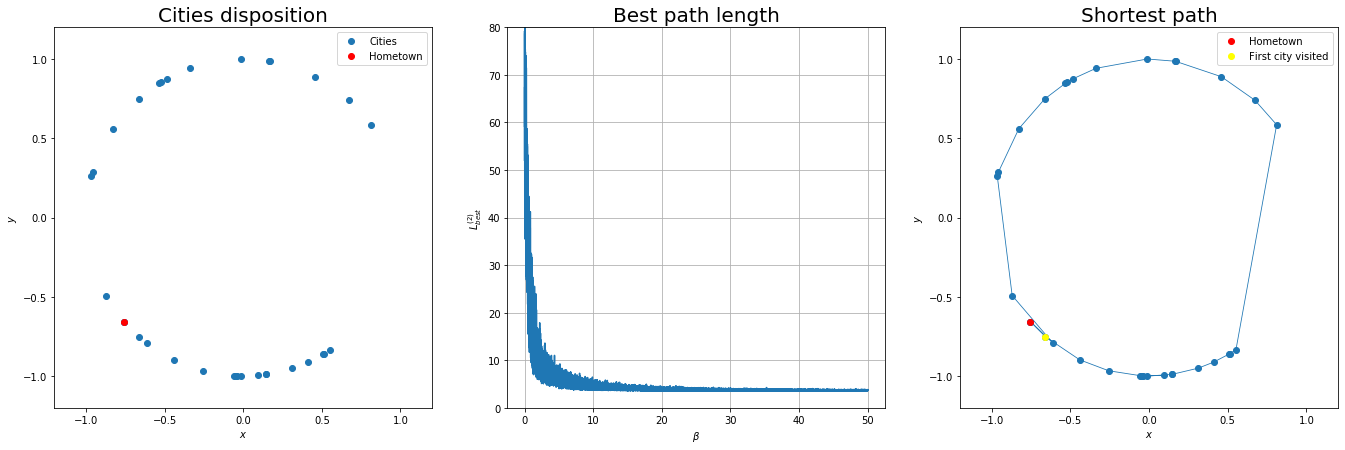

In [4]:
plt.figure(figsize=(23,7))

plt.subplot(131)
plt.title('Cities disposition', fontsize=20)
x, y = np.loadtxt("P1/Risultati/circ.0", usecols=(0,1), unpack='true')
plt.plot(x, y, linestyle='', marker='o', label='Cities')
plt.plot(x[0], y[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.subplot(132)
plt.title('Best path length', fontsize=20)
x, y= np.loadtxt("P1/Risultati/circ.shortest", usecols=(0,1), unpack='true')
plt.plot(x, y)
plt.ylim(0,80)
plt.xlabel(r'$\beta$')
plt.ylabel('$L^{(2)}_{best}$')
plt.grid(True)

plt.subplot(133)
plt.title('Shortest path', fontsize=20)
plt.plot(xc, yc, marker='o', lw=0.8)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

The path is quite good, it is longer than the one got with the genetic algorithm (it was $\sim 3.463$), and I can see there is something strange in the area near the hometown. 

### <font color="royalblue"> 32 cities placed IN a square of $\ell=2$

In [5]:
# Compute the optimized path length
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2

xc, yc = np.loadtxt("P1/Risultati/sq.fin", usecols=(0,1), unpack='true')
dim = np.size(xc)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xc[i], yc[i], xc[i+1], yc[i+1])

print('Optimized configuration path length = ', '%.3f' %sum)

Optimized configuration path length =  3.786


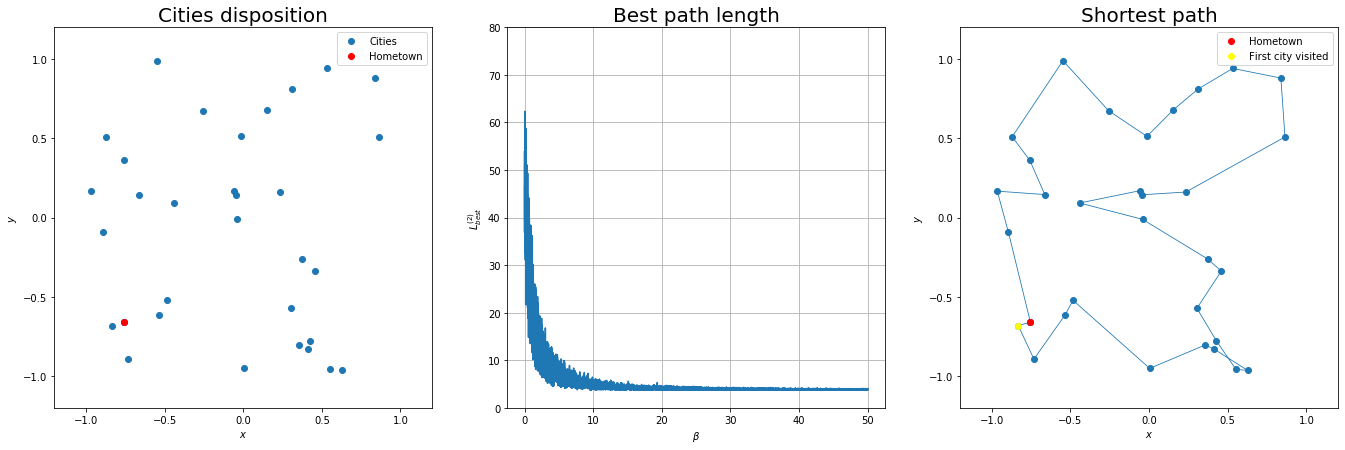

In [6]:
plt.figure(figsize=(23,7))

plt.subplot(131)
plt.title('Cities disposition', fontsize=20)
x, y = np.loadtxt("P1/Risultati/sq.0", usecols=(0,1), unpack='true')
plt.plot(x, y, linestyle='', marker='o', label='Cities')
plt.plot(x[0], y[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.subplot(132)
plt.title('Best path length', fontsize=20)
x, y= np.loadtxt("P1/Risultati/sq.shortest", usecols=(0,1), unpack='true')
plt.plot(x, y)
plt.ylim(0,80)
plt.xlabel(r'$\beta$')
plt.ylabel('$L^{(2)}_{best}$')
plt.grid(True)

plt.subplot(133)
plt.title('Shortest path', fontsize=20)
plt.plot(xc, yc, marker='o', lw=0.8)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

The results of the square are very similar to the best ones got with the genetic algorithm. It is quite interesting that, even if the path lenght are almost the same, the first city visited is different in the results obtained with this two algorithms.

### <font color="blue"> Part 02

*Observations: the parallel programming needs different commands to compile and execute. One can compile with the usual* **make** *command, and then execute with* **make run**. *Sometimes the nodes enter in conflicts during the creation of the first generation from the first* Individual *and there is an error on the size of the population on screen, so the user has to run the program another time*. 

I perform the genetic algorithm of `Exercitation_09` with a parallel programming execution, with the *MPI libraries*. I used 4 parallel GA searches of the optimal path. 
Each node performs an indipendent GA search (it is a *Continent*) but I made that every $N_{migr} = 10$ generations there is a *migration* of the best individuals of each continent, which exchange in pairs.  
In particular, I made use of the routines <a href="https://www.mpich.org/static/docs/latest/www3/MPI_Isend.html"> MPI_Isend</a>, <a href="https://www.mpich.org/static/docs/latest/www3/MPI_Recv.html"> MPI_Recv</a>, <a href="https://www.mpich.org/static/docs/latest/www3/MPI_Send.html"> MPI_Send</a> in the migrations and finally I use <a href="https://www.mpich.org/static/docs/latest/www3/MPI_Gather.html"> MPI_Gather</a> to collect all the final results and compare them in the same node to find the best one.  
I apply this parallelization to the code of Exercitation 9, in the situation of $N_{city}=32$ cities placed inside a square.  
I fix the same positions of the cities, in order to be able to compare the results.

After some attemp, I use the following parameters:
- $N_{pop} = 1500$;
- $N_{gen} = 500$;
- $N_{migr} = 10$ (I have finally 50 migrations between *Continents*);
- $N_{mut}=2$ (In my attemps I noticed that the results are very affected of this parameter, and are worse with a higher value. It seems reasonable because it is the number of mutations for each node); 

In the following I show some sub-result for each node, to observe that every node has a different random seed and explores different paths and mutations. I got (files `nodeL2.best`)  


|         | Node 0           | Node 1    | Node 2           | Node 3    |
| ----------------- |:-------------:| :------:|:-------------:| :------:|
| $L_2(\mathrm{rank})$     | 4.977 | 5.221 | 4.078 | 4.645 |

Then I added the calculation of the best loss function $L_2$ and the best path.

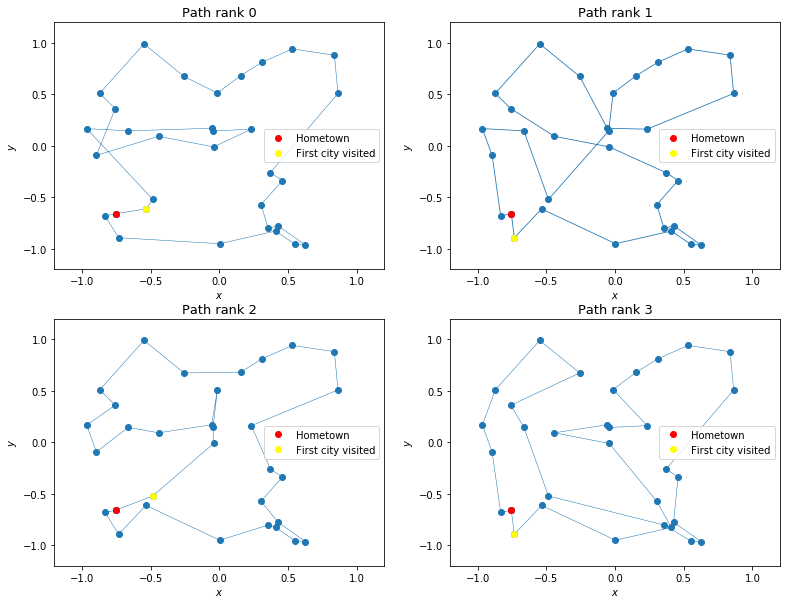

In [11]:
plt.figure(figsize=(13,10))

plt.subplot(221)
xc, yc = np.loadtxt("P2/Risultati/0cities.best", usecols=(0,1), unpack='true')
plt.title('Path rank 0', fontsize=13)
plt.plot(xc, yc, marker='o', lw=0.5)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.subplot(222)
xc, yc = np.loadtxt("P2/Risultati/1cities.best", usecols=(0,1), unpack='true')
plt.title('Path rank 1', fontsize=13)
plt.plot(xc, yc, marker='o', lw=0.8)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.subplot(223)
xc, yc = np.loadtxt("P2/Risultati/2cities.best", usecols=(0,1), unpack='true')
plt.title('Path rank 2', fontsize=13)
plt.plot(xc, yc, marker='o', lw=0.5)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.subplot(224)
xc, yc = np.loadtxt("P2/Risultati/3cities.best", usecols=(0,1), unpack='true')
plt.title('Path rank 3', fontsize=13)
plt.plot(xc, yc, marker='o', lw=0.5)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()
plt.show()

In [12]:
# Compute the optimized path length
def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2

xc, yc = np.loadtxt("P2/Risultati/Square.ris", usecols=(0,1), unpack='true')
dim = np.size(xc)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xc[i], yc[i], xc[i+1], yc[i+1])

print('Optimized configuration path length = ', '%.3f' %sum)

Optimized configuration path length =  4.078


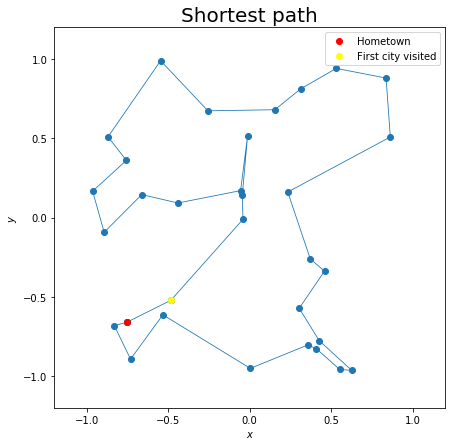

In [13]:
plt.figure(figsize=(7,7))
xc, yc = np.loadtxt("P2/Risultati/Square.ris", usecols=(0,1), unpack='true')
plt.title('Shortest path', fontsize=20)
plt.plot(xc, yc, marker='o', lw=0.8)
plt.plot(xc[0], yc[0], linestyle=' ', marker='o', color='red', label='Hometown')
plt.plot(xc[1], yc[1], linestyle=' ', marker='o', color='yellow', label='First city visited')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

The results are in well agreement with the ones of the exercitation 9. They converge to the same best path lenght.  
The parallel programming made the code quicker in time in the execution and moreover it required populations less numerous (1500 vs 2000) and less generations (500 vs 1000) to get almost the same results.